In [1]:
import os
import sys
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [4]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1

Grid search bert-base-uncased, learning rate 1e-05


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5649	Val Loss:	0.5089	Accuracy:	0.7396	F1:	0.4252
2 / 30: Train Loss:	0.4643	Val Loss:	0.4319	Accuracy:	0.8096	F1:	0.7451
3 / 30: Train Loss:	0.3451	Val Loss:	0.3916	Accuracy:	0.8140	F1:	0.7605
4 / 30: Train Loss:	0.2225	Val Loss:	0.3906	Accuracy:	0.8096	F1:	0.7599
5 / 30: Train Loss:	0.1123	Val Loss:	0.5959	Accuracy:	0.7527	F1:	0.7271
6 / 30: Train Loss:	0.0787	Val Loss:	0.9361	Accuracy:	0.6652	F1:	0.6535
No improvement for 3 epochs. Stopping early.
not quantized, is_quantized: False
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.64      0.66      0.65       119
      struct       0.88      0.87      0.87       338

    accuracy                           0.81       457
   macro avg       0.76      0.76      0.76       457
weighted avg       0.82      0.81      0.81       457

not quantized, is_quantized: False
test results:
              precision    recall  f1-score   support

       bknow  

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5134	Val Loss:	0.4177	Accuracy:	0.8053	F1:	0.7328
2 / 30: Train Loss:	0.3118	Val Loss:	0.4138	Accuracy:	0.8403	F1:	0.7584
3 / 30: Train Loss:	0.1837	Val Loss:	0.3807	Accuracy:	0.8446	F1:	0.7446
4 / 30: Train Loss:	0.1162	Val Loss:	0.5028	Accuracy:	0.7921	F1:	0.7578
5 / 30: Train Loss:	0.0768	Val Loss:	1.3769	Accuracy:	0.5908	F1:	0.5866
No improvement for 3 epochs. Stopping early.
not quantized, is_quantized: False
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.82      0.50      0.62       119
      struct       0.84      0.96      0.90       338

    accuracy                           0.84       457
   macro avg       0.83      0.73      0.76       457
weighted avg       0.84      0.84      0.83       457

not quantized, is_quantized: False
test results:
              precision    recall  f1-score   support

       bknow       0.67      0.42      0.51        67
      struct       0.82      0.9

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5310	Val Loss:	0.4811	Accuracy:	0.7681	F1:	0.7260
2 / 30: Train Loss:	0.3439	Val Loss:	0.3782	Accuracy:	0.8512	F1:	0.7912
3 / 30: Train Loss:	0.1873	Val Loss:	0.5958	Accuracy:	0.8184	F1:	0.6808
4 / 30: Train Loss:	0.2862	Val Loss:	0.4722	Accuracy:	0.8118	F1:	0.7632
5 / 30: Train Loss:	0.1083	Val Loss:	0.5225	Accuracy:	0.8031	F1:	0.7570
No improvement for 3 epochs. Stopping early.
not quantized, is_quantized: False
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.77      0.61      0.68       119
      struct       0.87      0.94      0.90       338

    accuracy                           0.85       457
   macro avg       0.82      0.77      0.79       457
weighted avg       0.85      0.85      0.84       457

not quantized, is_quantized: False
test results:
              precision    recall  f1-score   support

       bknow       0.69      0.64      0.67        67
      struct       0.88      0.9

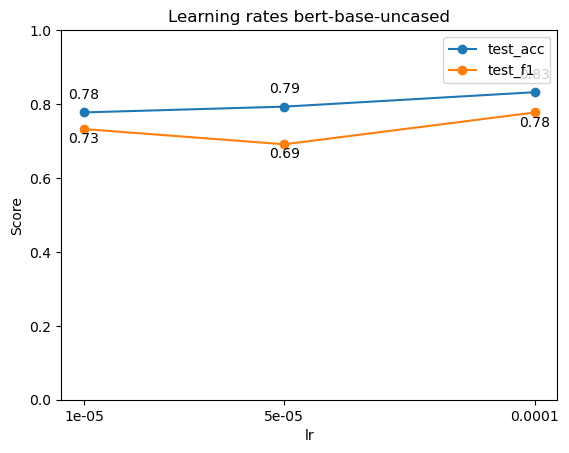

In [6]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=True)

In [ ]:
%reset -f